<a href="https://colab.research.google.com/github/Gunawanworks/machine_learning/blob/main/high_pass_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [6]:
img = cv.imread('/content/lena.jpg',0)

In [7]:
img_freq_doma = np.fft.fft2(img)
print('this is image the array of freq domain ->')
print(img_freq_doma)

# convert spatial domain into frequency domain

this is image the array of freq domain ->
[[ 3.25584420e+07      +0.j         -4.55468851e+05+2391823.01051496j
   1.53695219e+06-1137267.31278729j ... -2.37780285e+05 -635111.17660188j
   1.53695219e+06+1137267.31278729j -4.55468851e+05-2391823.01051496j]
 [-2.89384382e+04-1225777.74145847j -1.59077386e+06+1592406.45389677j
  -1.10652447e+06  +81096.16923336j ...  6.51250340e+05 +812328.36159386j
  -3.56306734e+05 +448718.36945015j  3.66405466e+04 +944236.08344871j]
 [-4.49311818e+05 -164430.6103565j  -2.75677037e+05 -132488.82213991j
   6.66730683e+05 -455291.76973513j ...  3.52412215e+05 +925903.62954245j
  -7.22673120e+05 -174511.30795991j  8.20435954e+05  -63724.63055699j]
 ...
 [ 5.17277644e+05 -213892.50990866j  7.35270789e+05 +708427.16339084j
  -5.25448028e+05 -201098.97219547j ...  9.93534888e+05 +115667.24175333j
   1.34102804e+05 -679229.17173844j -5.71430955e+04 +604366.05906284j]
 [-4.49311818e+05 +164430.6103565j   8.20435954e+05  +63724.63055699j
  -7.22673120e+05 +1745

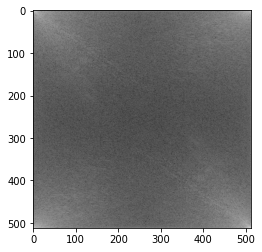

In [8]:

plt.imshow(np.log1p(np.abs(img_freq_doma)),cmap = 'gray')
plt.show()

# from the result, as we can see the white area shows where the low freq located (corner of the image)

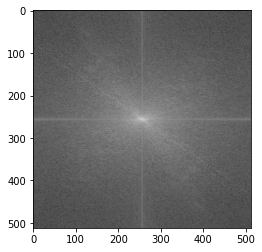

In [9]:
# we can shift the low freq to the middle area with this code
shift_freq_doma = np.fft.fftshift(img_freq_doma)
plt.imshow(np.log1p(np.abs(shift_freq_doma)),cmap='gray')
plt.show()

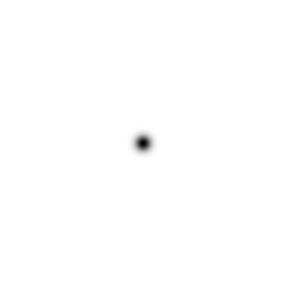

In [10]:
# creating gaussian low pass filter 
m,n = img.shape
H = (np.zeros((m,n), dtype = np.float32))
D0 = 10
# cut off frequency (can be any positive number)
for u in range(m):
    for v in range(n):
        D = np.sqrt((u-m/2)**2 + (v-n/2)**2)
        H[u,v] = (np.exp(-D**2/(2*D0*D0)))
#         rumus gaussian exponential     

H = 1-H
plt.figure(figsize=(5,5))
plt.imshow(H, cmap = 'gray')
plt.axis('off')
plt.show()

# white color in the middle present '1'
# black color present '0'

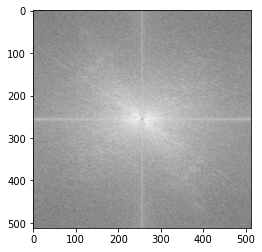

In [11]:
# next we filter the image by multiplying our image in the frequency domain with ideal low pass filter
# here is the result of filter emit in frequency domain

Gshift = shift_freq_doma*H
plt.imshow(np.log1p(np.abs(Gshift)),cmap = 'gray')
plt.show()

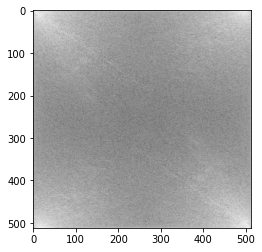

In [12]:
# karena kita sudah shift low freq ke tengah agar image dapat ditampilkan secara normal maka kita harus shift low freqnya kembali ke posisi awal dengan

G = np.fft.fftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)),cmap = 'gray')
# plt.axis('off')
plt.show()

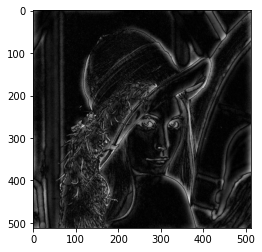

In [13]:
g = np.abs(np.fft.ifft2(G))
plt.imshow(g,cmap='gray')
plt.show()